<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/02_DeepLearning_Task_2__Week_5_RNN%2CLSTM%2C_GRU_ReviewTokoBaju_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow
#!pip install scikit-learn

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Tensorflow

###Data Preparation

In [127]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

In [128]:
df['Review Text'] = df['Review Text'].astype(str)
df['Review Text'] = df['Review Text'].str.lower()
df['sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))
df = df.dropna(subset=['sentiment'])
df['sentiment'] = df['sentiment'].astype(int)

In [129]:
num_words = 10000
maxlen = 200

In [130]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df['Review Text'])
sequences = tokenizer.texts_to_sequences(df['Review Text'])
x = pad_sequences(sequences, maxlen=maxlen)
y = df['sentiment'].values

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###RNN

Pemodelan RNN

In [65]:
def rnn_model(vocab_size, embed_size=128, hidden_size=128):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        SimpleRNN(hidden_size, dropout=0.3, recurrent_dropout=0.3, return_sequences=False),
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimzer

In [66]:
rnn_model = rnn_model(num_words)
rnn_optimizer = Adam(learning_rate=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training data 😀😀😀

In [67]:
def train_rnn_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=64):
    model.compile(optimizer=rnn_optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)
    ]

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    return model, history

# Train the model
trained_rnn, rnn_history = train_rnn_model(rnn_model, x_train, y_train, x_test, y_test)

# Evaluate
loss, accuracy = trained_rnn.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8463 - loss: 0.9587 - val_accuracy: 0.8824 - val_loss: 0.4506 - learning_rate: 0.0010
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8838 - loss: 0.4174 - val_accuracy: 0.8824 - val_loss: 0.3749 - learning_rate: 0.0010
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8791 - loss: 0.3823 - val_accuracy: 0.8824 - val_loss: 0.3670 - learning_rate: 0.0010
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8850 - loss: 0.3576 - val_accuracy: 0.8824 - val_loss: 0.3573 - learning_rate: 0.0010
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8819 - loss: 0.3452 - val_accuracy: 0.8824 - val_loss: 0.3296 - learning_rate: 0.0010
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8842 - loss: 0.3082 - val_accuracy: 0.8824 - val_loss: 0.3452 - learning_rate: 0.0010
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8811 - loss

###LSTM

Modeling data LSTM

In [104]:
def lstm_model(vocab_size, embed_size=128, hidden_size=128):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        LSTM(hidden_size, dropout=0.3, return_sequences=False),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimizer

In [105]:
lstm_model = lstm_model(num_words)
lstm_optimizer = Adam(learning_rate=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training data 😀😀😀

In [106]:
def train_lstm_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=64):
    model.compile(optimizer=lstm_optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-5)
    ]

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    return model, history

# Train the model
print("\nTraining LSTM model...")
trained_lstm, lstm_history = train_lstm_model(lstm_model, x_train, y_train, x_test, y_test)


Training LSTM model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 111ms/step - accuracy: 0.8855 - loss: 0.3616 - val_accuracy: 0.9243 - val_loss: 0.2033 - learning_rate: 0.0010
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.9444 - loss: 0.1465 - val_accuracy: 0.9316 - val_loss: 0.1751 - learning_rate: 0.0010
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9566 - loss: 0.1148 - val_accuracy: 0.9348 - val_loss: 0.1768 - learning_rate: 0.0010
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.9728 - loss: 0.0819 - val_accuracy: 0.9217 - val_loss: 0.2001 - learning_rate: 0.0010
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.9800 - loss: 0.0606 - val_accuracy: 0.9331 - val_loss: 0.2518 - learning_rate: 5.0000e-04


###GRU

Modeling data GRU

In [132]:
def gru_model(vocab_size, embed_size=64, hidden_size=64):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        Bidirectional(GRU(hidden_size, dropout=0.2, return_sequences=True)),
        GlobalAveragePooling1D(),  # Lebih ringan daripada GRU kedua
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimizer

In [133]:
gru_model = gru_model(num_words, embed_size=128, hidden_size=128)
gru_optimizer = Adam(learning_rate=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training data 😀😀😀

In [134]:
def train_gru_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=64):
    model.compile(
        optimizer=gru_optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6, verbose=1),
        ModelCheckpoint('best_gru_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    ]

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1,
    )

    return model, history

# Train and evaluate the GRU model
print("\nTraining GRU model...")
trained_gru, gru_history = train_gru_model(gru_model, x_train, y_train, x_test, y_test)
loss, accuracy, precision, recall = trained_gru.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


Training GRU model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8633 - loss: 0.4007 - precision: 0.8793 - recall: 0.9797

258/258 ━━━━━━━━━━━━━━━━━━━━ 49s 189ms/step - accuracy: 0.8634 - loss: 0.4006 - precision: 0.8794 - recall: 0.9797 - val_accuracy: 0.8501 - val_loss: 0.2995 - val_precision: 0.9397 - val_recall: 0.8870 - learning_rate: 0.0010
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9031 - loss: 0.2392 - precision: 0.9275 - recall: 0.9661

258/258 ━━━━━━━━━━━━━━━━━━━━ 50s 194ms/step - accuracy: 0.9031 - loss: 0.2391 - precision: 0.9276 - recall: 0.9661 - val_accuracy: 0.9306 - val_loss: 0.1668 - val_precision: 0.9574 - val_recall: 0.9643 - learning_rate: 0.0010
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9490 - loss: 0.1405 - precision: 0.9704 - recall: 0.9718

258/258 ━━━━━━━━━━━━━━━━━━━━ 81s 190ms/step - accuracy: 0.9490 - loss: 0.1405 - precision: 0.9704 - recall: 0.9718 - val_accuracy: 0.9348 - val_loss: 0.1568 - val_precision: 0.9609 - val_recall: 0.9654 - learning_rate: 0.0010
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9652 - loss: 0.1008 - precision: 0.9807 - recall: 0.9801

258/258 ━━━━━━━━━━━━━━━━━━━━ 49s 191ms/step - accuracy: 0.9652 - loss: 0.1008 - precision: 0.9807 - recall: 0.9801 - val_accuracy: 0.9369 - val_loss: 0.1672 - val_precision: 0.9567 - val_recall: 0.9725 - learning_rate: 0.0010
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 49s 189ms/step - accuracy: 0.9754 - loss: 0.0767 - precision: 0.9864 - recall: 0.9857 - val_accuracy: 0.9287 - val_loss: 0.1775 - val_precision: 0.9614 - val_recall: 0.9577 - learning_rate: 0.0010
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9823 - loss: 0.0597 - precision: 0.9896 - recall: 0.9902
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
258/258 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.9823 - loss: 0.0598 - precision: 0.9896 - recall: 0.9902 - val_accuracy: 0.9362 - val_loss: 0.2120 - val_precision: 0.9557 - val_recall: 0.9728 - learning_rate: 0.0010
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.
129/129 ━━━━━━━━━━━━━━━━━━━

###Evaluasi dari RNN, LSTM, dan GRU

Modeling evaluasi untuk RNN, LSTM, dan GRU

In [135]:
def evaluate_model(model, x_test, y_test, model_name):
    y_prob = model.predict(x_test).flatten()
    y_pred = (y_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name} Evaluation:")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    plt.xticks([0,1], ['Negative', 'Positive'])
    plt.yticks([0,1], ['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white' if cm[i,j] > cm.max()/2 else 'black')

    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

perbandingan antara RNN, LSTM, GRU

129/129 ━━━━━━━━━━━━━━━━━━━━ 71s 541ms/step

RNN Evaluation:
Accuracy: 0.9066
Precision: 0.9200
Recall: 0.9794
F1 Score: 0.9487
ROC AUC: 0.8141

Classification Report:
              precision    recall  f1-score   support

    Negative       0.70      0.36      0.48       485
    Positive       0.92      0.98      0.95      3638

    accuracy                           0.91      4123
   macro avg       0.81      0.67      0.71      4123
weighted avg       0.89      0.91      0.89      4123



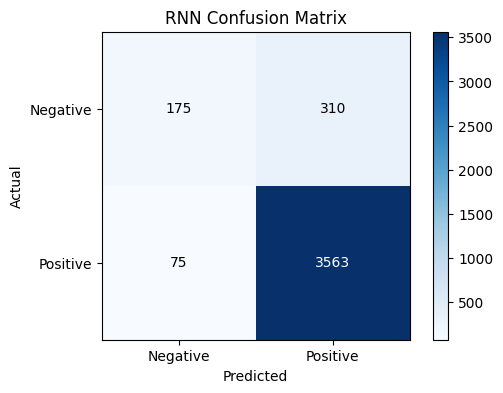

  4/129 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step

LSTM Evaluation:
Accuracy: 0.9333
Precision: 0.9394
Recall: 0.9882
F1 Score: 0.9632
ROC AUC: 0.9490

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.52      0.65       485
    Positive       0.94      0.99      0.96      3638

    accuracy                           0.93      4123
   macro avg       0.90      0.75      0.81      4123
weighted avg       0.93      0.93      0.93      4123



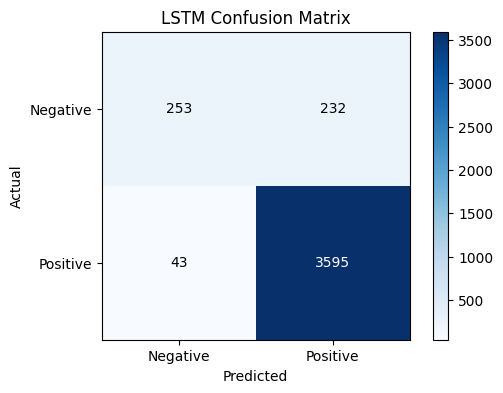

  3/129 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step

GRU Evaluation:
Accuracy: 0.9357
Precision: 0.9622
Recall: 0.9651
F1 Score: 0.9636
ROC AUC: 0.9607

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72       485
    Positive       0.96      0.97      0.96      3638

    accuracy                           0.94      4123
   macro avg       0.85      0.84      0.84      4123
weighted avg       0.94      0.94      0.94      4123



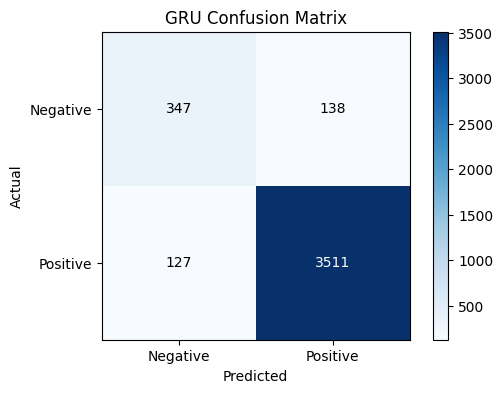

In [136]:
rnn_results = evaluate_model(rnn_model, x_test, y_test, 'RNN')
lstm_results = evaluate_model(lstm_model, x_test, y_test, 'LSTM')
gru_results = evaluate_model(gru_model, x_test, y_test, 'GRU')

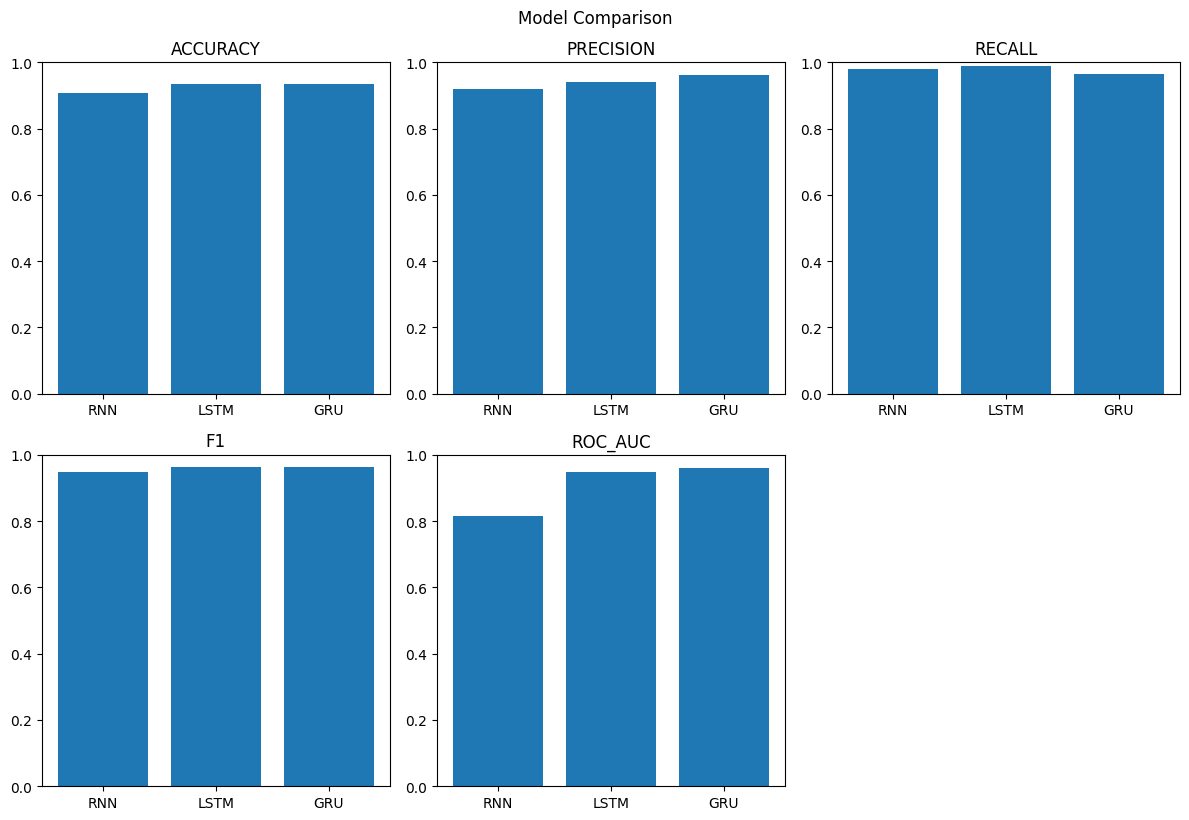

In [137]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {'RNN': rnn_results, 'LSTM': lstm_results, 'GRU': gru_results}

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.bar(results.keys(), [results[model][metric] for model in results])
    plt.title(metric.upper())
    plt.ylim(0, 1)
plt.tight_layout()
plt.suptitle('Model Comparison', y=1.02)
plt.show()

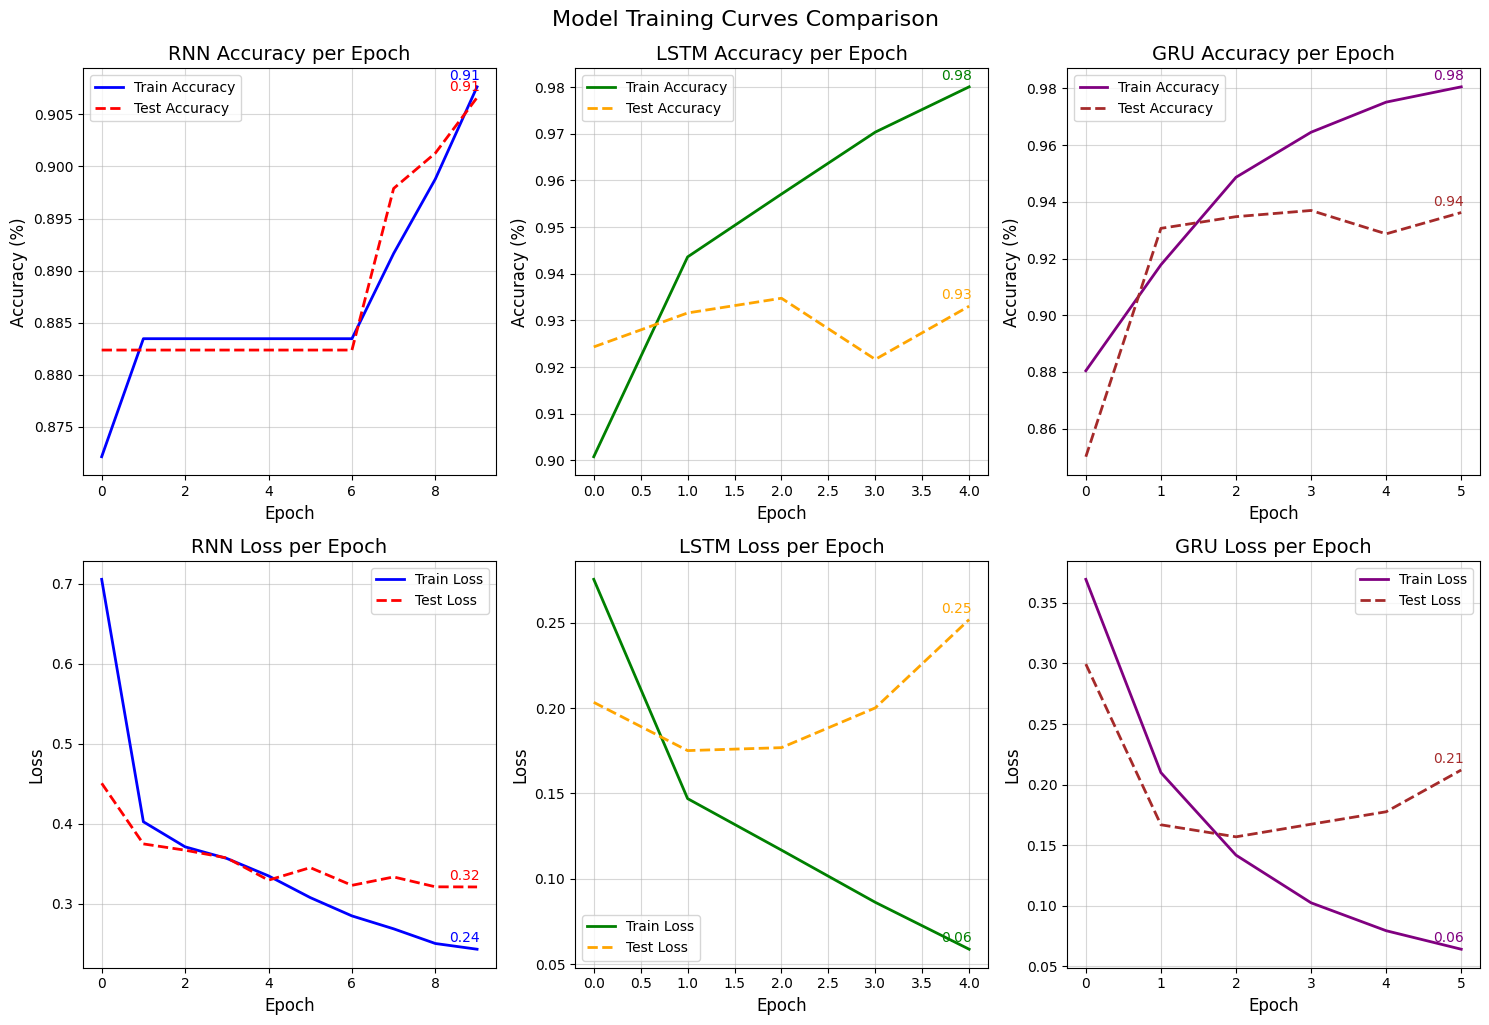

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# RNN Training Curves
plt.subplot(2, 3, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
plt.plot(rnn_history.history['val_accuracy'], '--', label='Test Accuracy', color='red', linewidth=2)
plt.title('RNN Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{rnn_history.history['accuracy'][-1]:.2f}",
             xy=(len(rnn_history.history['accuracy']) - 1, rnn_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='blue')
plt.annotate(f"{rnn_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(rnn_history.history['val_accuracy']) - 1, rnn_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='red')

plt.subplot(2, 3, 4)
plt.plot(rnn_history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(rnn_history.history['val_loss'], '--', label='Test Loss', color='red', linewidth=2)
plt.title('RNN Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{rnn_history.history['loss'][-1]:.2f}",
             xy=(len(rnn_history.history['loss']) - 1, rnn_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='blue')
plt.annotate(f"{rnn_history.history['val_loss'][-1]:.2f}",
             xy=(len(rnn_history.history['val_loss']) - 1, rnn_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='red')

# LSTM Training Curves
plt.subplot(2, 3, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy', color='green', linewidth=2)
plt.plot(lstm_history.history['val_accuracy'], '--', label='Test Accuracy', color='orange', linewidth=2)
plt.title('LSTM Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{lstm_history.history['accuracy'][-1]:.2f}",
             xy=(len(lstm_history.history['accuracy']) - 1, lstm_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='green')
plt.annotate(f"{lstm_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(lstm_history.history['val_accuracy']) - 1, lstm_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='orange')

plt.subplot(2, 3, 5)
plt.plot(lstm_history.history['loss'], label='Train Loss', color='green', linewidth=2)
plt.plot(lstm_history.history['val_loss'], '--', label='Test Loss', color='orange', linewidth=2)
plt.title('LSTM Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{lstm_history.history['loss'][-1]:.2f}",
             xy=(len(lstm_history.history['loss']) - 1, lstm_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='green')
plt.annotate(f"{lstm_history.history['val_loss'][-1]:.2f}",
             xy=(len(lstm_history.history['val_loss']) - 1, lstm_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='orange')

# GRU Training Curves
plt.subplot(2, 3, 3)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy', color='purple', linewidth=2)
plt.plot(gru_history.history['val_accuracy'], '--', label='Test Accuracy', color='brown', linewidth=2)
plt.title('GRU Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{gru_history.history['accuracy'][-1]:.2f}",
             xy=(len(gru_history.history['accuracy']) - 1, gru_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='purple')
plt.annotate(f"{gru_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(gru_history.history['val_accuracy']) - 1, gru_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='brown')

plt.subplot(2, 3, 6)
plt.plot(gru_history.history['loss'], label='Train Loss', color='purple', linewidth=2)
plt.plot(gru_history.history['val_loss'], '--', label='Test Loss', color='brown', linewidth=2)
plt.title('GRU Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{gru_history.history['loss'][-1]:.2f}",
             xy=(len(gru_history.history['loss']) - 1, gru_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='purple')
plt.annotate(f"{gru_history.history['val_loss'][-1]:.2f}",
             xy=(len(gru_history.history['val_loss']) - 1, gru_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='brown')

plt.tight_layout()
plt.suptitle('Model Training Curves Comparison', fontsize=16, y=1.02)
plt.show()